In [ ]:
import pandas as pd

df_unsw = pd.read_csv('/content/drive/MyDrive/UNSW.csv')
df_blockchain = pd.read_csv('/content/drive/MyDrive/blockchain_dataset.csv', )

print("UNSW Network Traffic Dataset:")
print(df_unsw.head())

print("\nBlockchain Dataset:")
print(df_blockchain.head())

UNSW Network Traffic Dataset:
      id       dur  proto service state  spkts  dpkts  sbytes  dbytes  \
0  70299  0.823171    tcp       -   FIN     10      8     564     354   
1  70300  0.000006   unas       -   INT      2      0     200       0   
2  70301  0.000009   mhrp       -   INT      2      0     200       0   
3  70302  0.000005  swipe       -   INT      2      0     200       0   
4  70303  0.458109    tcp       -   FIN     12     10    2484     443   

            rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0      20.651845  ...                 1               1             0   
1  166666.660800  ...                 2               5             0   
2  111111.107200  ...                 2               4             0   
3  200000.005100  ...                 1               4             0   
4      45.840620  ...                 1               1             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Identify categorical columns
print("\nCategorical Columns in UNSW Dataset:")
print(df_unsw.select_dtypes(include=['object']).columns)

print("\nCategorical Columns in Blockchain Dataset:")
print(df_blockchain.select_dtypes(include=['object']).columns)


Categorical Columns in UNSW Dataset:
Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

Categorical Columns in Blockchain Dataset:
Index(['block_hash', 'Merkle_root', 'timestamp', 'transaction_type',
       'fraud_context'],
      dtype='object')


In [ ]:
unsw_categorical_cols = ['proto', 'service', 'state', 'attack_cat']
unsw_encoded_df = pd.get_dummies(df_unsw, columns=unsw_categorical_cols)

unsw_encoded_df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_REQ,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,70299,0.823171,10,8,564,354,20.651845,254,252,4.937006e+03,...,False,False,False,False,False,False,False,True,False,False
1,70300,0.000006,2,0,200,0,166666.660800,254,0,1.333333e+08,...,False,False,False,False,True,False,False,False,False,False
2,70301,0.000009,2,0,200,0,111111.107200,254,0,8.888889e+07,...,False,False,False,False,True,False,False,False,False,False
3,70302,0.000005,2,0,200,0,200000.005100,254,0,1.600000e+08,...,False,False,False,False,False,False,False,True,False,False
4,70303,0.458109,12,10,2484,443,45.840620,254,252,3.976346e+04,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
blockchain_categorical_cols = ['transaction_type', 'fraud_context']
blockchain_encoded_df = pd.get_dummies(df_blockchain, columns=blockchain_categorical_cols)

blockchain_encoded_df.head()

,transaction_id,block_hash,Merkle_root,Difficulty_Level,amount,gas_fee,timestamp,block_number,gas_limit,gas_used,nonce,is_fraudulent,transaction_type_Contract Execution,transaction_type_Token Swap,transaction_type_Transfer,fraud_context_normal,fraud_context_suspicious
0,1,7338d382ee72be773acec55e9dded3a15cdd0e7ea50c4b...,f9af4a5d09d8c6109b3232f6b9c7628de51cccaaf60a48...,9.230000e+14,23.4344,0.001988,9/27/2022 12:04,1782362,6837934,4713728,686,0,False,True,False,True,False
1,2,35a126e35cd7869cd4b1cc885fb2f3be5955888e2f76c3...,b1550404c3c799fe2793dd8c5e4dd1b2277c968d8d828d...,9.070000e+14,13.4675,0.039852,3/1/2022 8:14,1631471,6987198,3541264,295,0,False,False,True,False,True
2,3,c69fdb8b03b4a5af9e24a8f5ce2d005d1d68c79ee2a236...,44ed5a582561907a3adc643e6a7a54b6de785b7f113323...,9.220000e+14,37.3948,0.010036,10/2/2022 8:18,1767807,2746315,1730004,71,0,False,True,False,True,False
3,4,c604ea17d7694fc5dc8d7141c95a82c4da7fa01539c3c1...,93e9e910fcaa5bbe8b645f5e96933ffa8f8b731d761473...,4.640000e+14,39.3227,0.026047,3/25/2022 2:11,1826326,5452481,391151,726,0,False,False,True,True,False
4,5,7474ff1bfb935176e66b83478ece391d7cdebbf1ffec76...,7e50bc680c606e089eb670dfa8d48a963758f536225d67...,4.280000e+14,14.8426,0.018581,1/25/2022 22:39,1979934,3656366,1492346,757,0,True,False,False,True,False


In [ ]:
# Merging both datastes horizontally
combined_df = pd.concat([unsw_encoded_df, blockchain_encoded_df], axis=1)

# Display the shape of the combined dataset to verify
print(f"Shape of the combined dataset: {combined_df.shape}")
combined_df.head()

Shape of the combined dataset: (3000, 212)


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,block_number,gas_limit,gas_used,nonce,is_fraudulent,transaction_type_Contract Execution,transaction_type_Token Swap,transaction_type_Transfer,fraud_context_normal,fraud_context_suspicious
0,70299.0,0.823171,10.0,8.0,564.0,354.0,20.651845,254.0,252.0,4.937006e+03,...,1782362,6837934,4713728,686,0,False,True,False,True,False
1,70300.0,0.000006,2.0,0.0,200.0,0.0,166666.660800,254.0,0.0,1.333333e+08,...,1631471,6987198,3541264,295,0,False,False,True,False,True
2,70301.0,0.000009,2.0,0.0,200.0,0.0,111111.107200,254.0,0.0,8.888889e+07,...,1767807,2746315,1730004,71,0,False,True,False,True,False
3,70302.0,0.000005,2.0,0.0,200.0,0.0,200000.005100,254.0,0.0,1.600000e+08,...,1826326,5452481,391151,726,0,False,False,True,True,False
4,70303.0,0.458109,12.0,10.0,2484.0,443.0,45.840620,254.0,252.0,3.976346e+04,...,1979934,3656366,1492346,757,0,True,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

X = combined_df.drop(columns=['is_fraudulent'])
y = combined_df['is_fraudulent']
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (2400, 211), Test set shape: (600, 211)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

# Select numerical columns for scaling.. except for 'is_fraudulent' target column
numerical_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns

# Scale numerical columns
combined_df[numerical_columns] = scaler.fit_transform(combined_df[numerical_columns])
combined_df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,block_number,gas_limit,gas_used,nonce,is_fraudulent,transaction_type_Contract Execution,transaction_type_Token Swap,transaction_type_Transfer,fraud_context_normal,fraud_context_suspicious
0,-1.731253,-0.070088,-0.038813,-0.016264,-0.057834,-0.029990,-0.685945,0.391263,1.245241,-0.500679,...,0.979620,1.229043,0.336198,0.612630,-0.175863,False,True,False,True,False
1,-1.730098,-0.200356,-0.105369,-0.055450,-0.060241,-0.031297,0.230057,0.391263,-0.805919,0.097758,...,0.451665,1.293850,-0.173775,-0.723572,-0.175863,False,False,True,False,True
2,-1.728943,-0.200356,-0.105369,-0.055450,-0.060241,-0.031297,-0.075315,0.391263,-0.805919,-0.101729,...,0.928694,-0.547466,-0.961598,-1.489069,-0.175863,False,True,False,True,False
3,-1.727788,-0.200356,-0.105369,-0.055450,-0.060241,-0.031297,0.413280,0.391263,-0.805919,0.217449,...,1.133447,0.627503,-1.543943,0.749326,-0.175863,False,False,True,True,False
4,-1.726634,-0.127860,-0.022174,-0.006468,-0.045140,-0.029661,-0.685806,0.391263,1.245241,-0.500523,...,1.670909,-0.152338,-1.064969,0.855265,-0.175863,True,False,False,True,False


In [ ]:
# interaction features by multiplying certain columns
combined_df['sload_dload_ratio'] = combined_df['sload'] / (combined_df['dload'] + 1)  # Adding a small constant to avoid division by zero
combined_df['sbytes_dbytes_ratio'] = combined_df['sbytes'] / (combined_df['dbytes'] + 1)

In [ ]:
combined_df= combined_df.drop(columns=['block_number'])

In [ ]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_blockchain['transaction_type'] = label_encoder.fit_transform(df_blockchain['transaction_type'])

In [ ]:
# Display columns with string values that prevent correlation calculation
string_columns = combined_df.select_dtypes(include=['object']).columns
print("\nColumns with string values that may hamper correlation analysis:")
print(string_columns)

for col in string_columns:
    print(f"\nUnique values in column '{col}':")
    print(combined_df[col].unique())


Columns with string values that may hamper correlation analysis:
Index(['proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus',
       'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna',
       ...
       'attack_cat_DoS', 'attack_cat_Exploits', 'attack_cat_Fuzzers',
       'attack_cat_Normal', 'attack_cat_Reconnaissance',
       'attack_cat_Shellcode', 'attack_cat_Worms', 'block_hash', 'Merkle_root',
       'timestamp'],
      dtype='object', length=157)

Unique values in column 'proto_3pc':
[False True nan]

Unique values in column 'proto_a/n':
[False True nan]

Unique values in column 'proto_aes-sp3-d':
[False True nan]

Unique values in column 'proto_any':
[False True nan]

Unique values in column 'proto_argus':
[False True nan]

Unique values in column 'proto_aris':
[False True nan]

Unique values in column 'proto_arp':
[False True nan]

Unique values in column 'proto_ax.25':
[False True nan]

Unique values in column 'proto_bbn-rcc':
[False Tr

In [ ]:
combined_df = combined_df.drop(columns=['block_hash', 'Merkle_root', 'timestamp'])

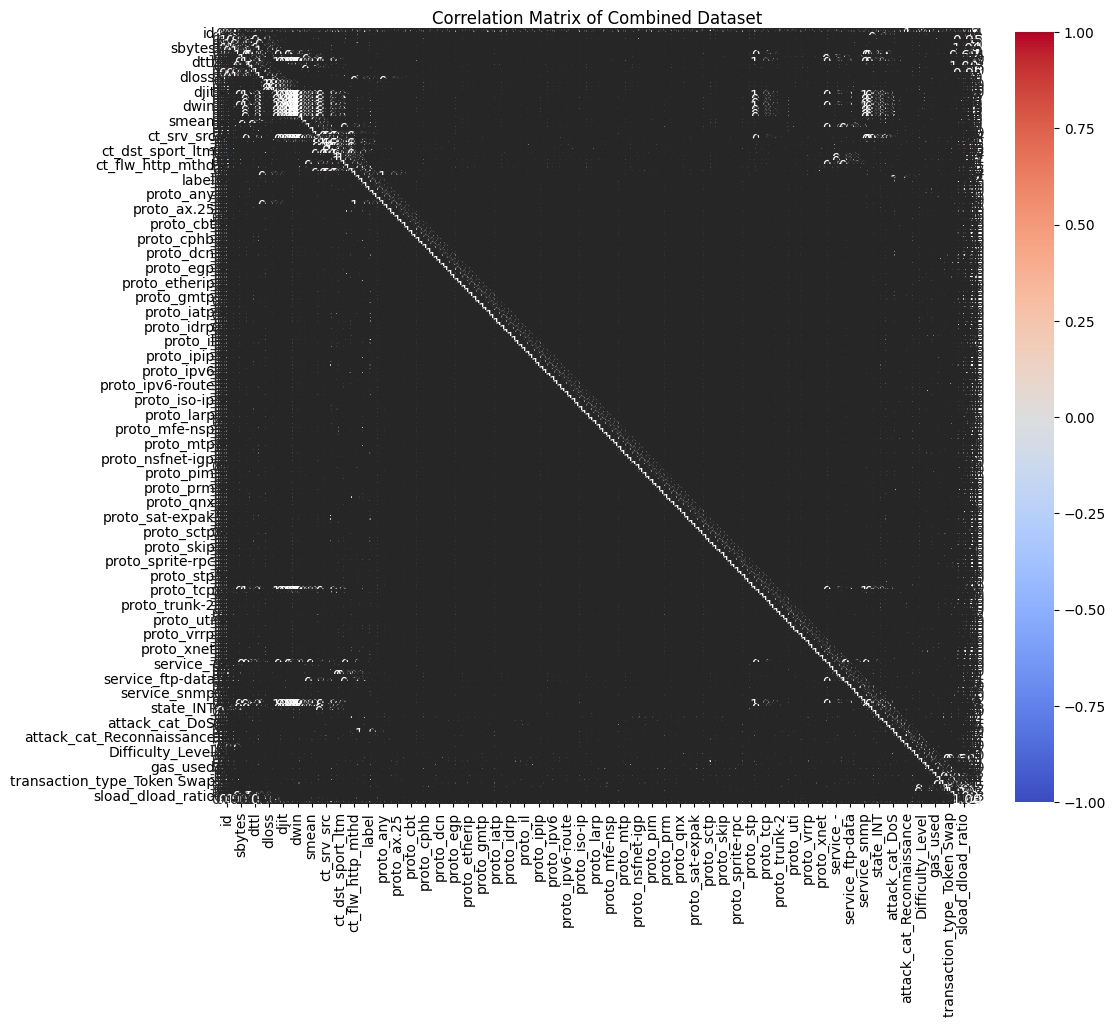

In [ ]:
# Correlation matrix to check for redundant features
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your combined dataset is named df_combined
corr_matrix = combined_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Combined Dataset')
plt.show()

In [ ]:
import numpy as np

# Set a correlation threshold
threshold = 0.9

# Find highly correlated features
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Remove highly correlated features
combined_df.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

combined_df['is_fraudulent'] = label_encoder.fit_transform(combined_df['is_fraudulent'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X_combined = combined_df.drop(columns=['is_fraudulent'])
y_combined = combined_df['is_fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)

# Perform RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_combined.columns[rfe.support_]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['id', 'dur', 'sload', 'smean', 'Difficulty_Level', 'amount', 'gas_fee',
       'gas_limit', 'gas_used', 'nonce'],
      dtype='object')


In [ ]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.97


In [ ]:
from sklearn.feature_selection import RFE
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 97.00%


In [ ]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

<ipython-input-22-8d2a9e121ee8>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.fillna(X_train.mean())


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")

SVM Accuracy: 97.00%


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Convert object columns in X_test to numerical or categorical
for col in X_test.select_dtypes(include=['object']).columns:
    # Try converting to numerical if possible
    try:
        X_test[col] = pd.to_numeric(X_test[col])
    except ValueError:
        # If not numerical, convert to categorical
        X_test[col] = X_test[col].astype('category')

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', enable_categorical=True)  # Enable categorical features
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

XGBoost Accuracy: 97.00%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

KNN Accuracy: 97.00%


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

# Convert X_train and X_test back to DataFrames if they are NumPy arrays
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train.reshape(X_train.shape[0], X_train.shape[1])) # Reshape to 2D and create DataFrame
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test.reshape(X_test.shape[0], X_test.shape[1]))   # Reshape to 2D and create DataFrame

# Convert object columns in X_train and X_test to numerical or categorical
for df in [X_train, X_test]:
    for col in df.select_dtypes(include=['object']).columns:
        # Try converting to numerical if possible
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            # If not numerical, convert to categorical using one-hot encoding
            df = pd.get_dummies(df, columns=[col], prefix=[col], drop_first=True)
            # Ensure X_train and X_test have the same columns after one-hot encoding
            X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Convert DataFrames to NumPy arrays
X_train = X_train.values.astype('float32')  # Explicitly convert to float32
X_test = X_test.values.astype('float32')   # Explicitly convert to float32

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = keras.Sequential(
    [
        layers.Conv1D(32, 3, activation="relu", input_shape=(X_train.shape[1], 1)),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, 3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5, batch_size=40, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9617 - loss: 0.2623 - val_accuracy: 0.9771 - val_loss: 0.1173
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.1462 - val_accuracy: 0.9771 - val_loss: 0.1140
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.1355 - val_accuracy: 0.9771 - val_loss: 0.1143
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1289 - val_accuracy: 0.9771 - val_loss: 0.1189
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9665 - loss: 0.1368 - val_accuracy: 0.9771 - val_loss: 0.1130
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9745 - loss: 0.1248
Test Loss: 0.1382
Test Accuracy: 97.00%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
print(f"Random Forest - Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-score: {rf_f1:.4f}")

# SVM
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
print(f"SVM - Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1-score: {svm_f1:.4f}")

# XGBoost
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f"XGBoost - Precision: {xgb_precision:.4f}, Recall: {xgb_recall:.4f}, F1-score: {xgb_f1:.4f}")

# KNN
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
print(f"KNN - Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1-score: {knn_f1:.4f}")


# CNN
y_pred_cnn = (model.predict(X_test) > 0.5).astype("int32")
cnn_precision = precision_score(y_test, y_pred_cnn)
cnn_recall = recall_score(y_test, y_pred_cnn)
cnn_f1 = f1_score(y_test, y_pred_cnn)
print(f"CNN - Precision: {cnn_precision:.4f}, Recall: {cnn_recall:.4f}, F1-score: {cnn_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Random Forest - Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
SVM - Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
XGBoost - Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
KNN - Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
CNN - Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


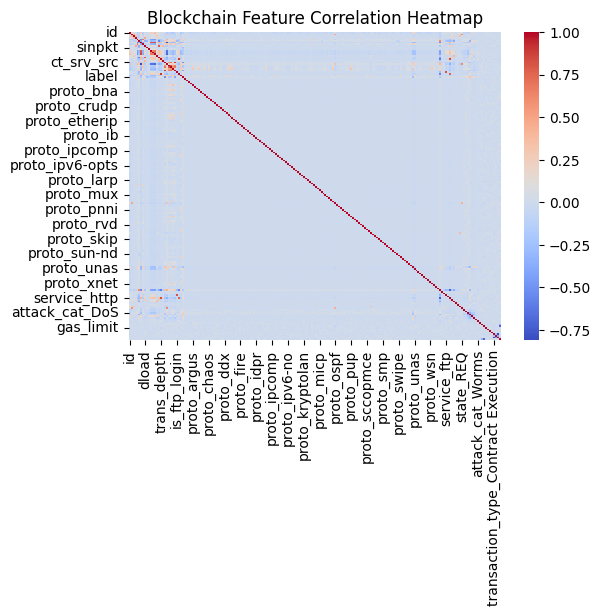

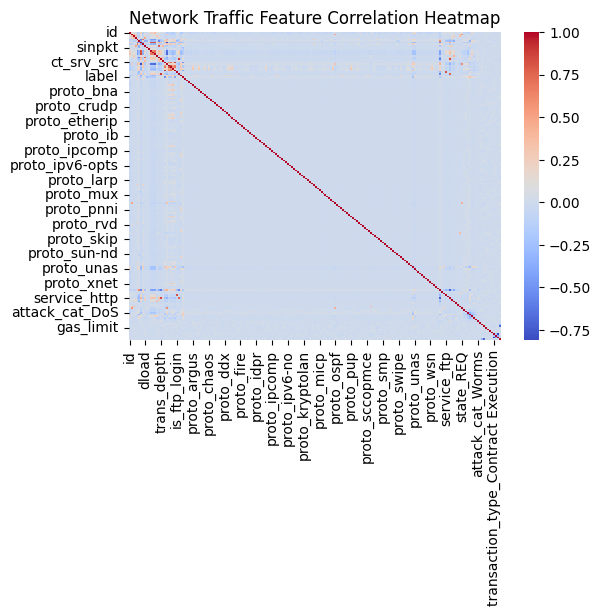

<ipython-input-34-9763d35eaef0>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='is_fraudulent', palette='Set2')


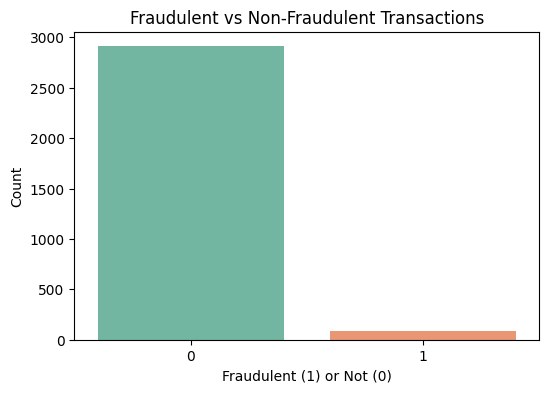

<ipython-input-34-9763d35eaef0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, x='label', palette='Set1')


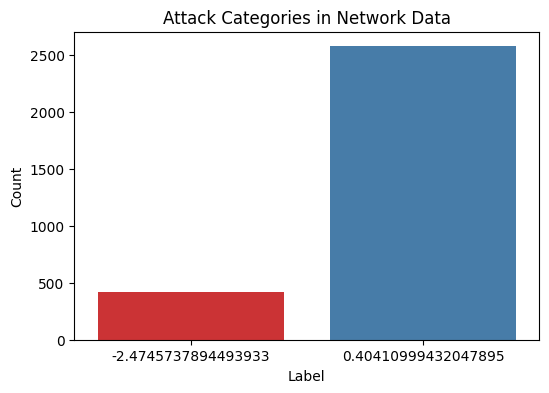

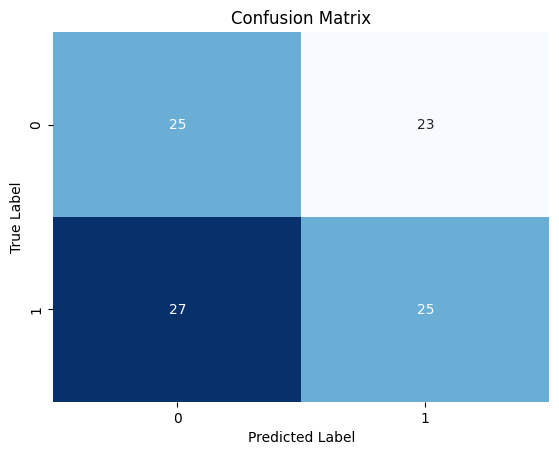

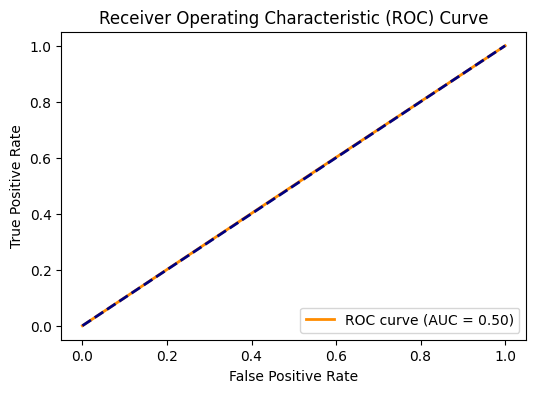

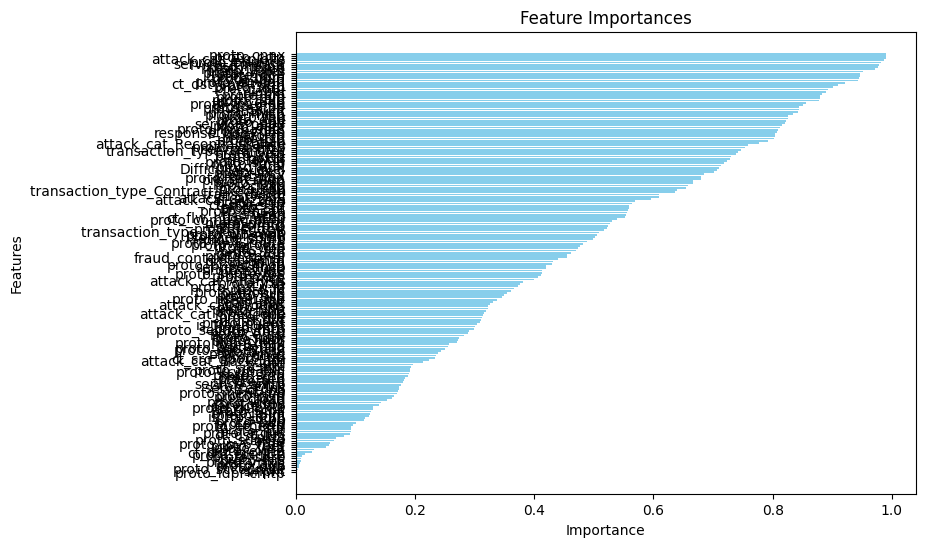

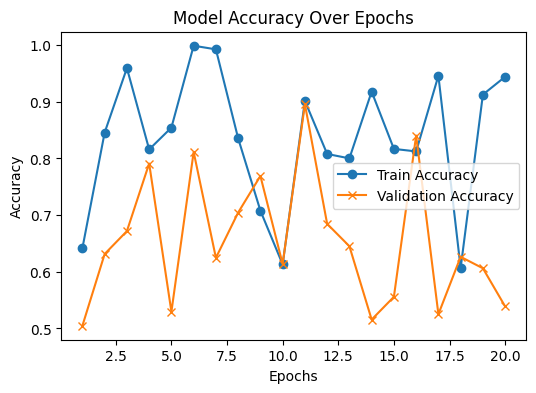

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np


# 1. Feature Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(combined_df.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Blockchain Feature Correlation Heatmap')
plt.show()

plt.figure(figsize=(6, 4))
sns.heatmap(combined_df.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Network Traffic Feature Correlation Heatmap')
plt.show()

# 2. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df, x='is_fraudulent', palette='Set2')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraudulent (1) or Not (0)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df, x='label', palette='Set1')
plt.title('Attack Categories in Network Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()



# ================ Model Evaluation Visualizations ================

# Mock predictions and true labels (replace these with your model predictions)
y_true = np.random.randint(0, 2, 100)  # Replace with actual labels
y_pred = np.random.randint(0, 2, 100)  # Replace with actual predictions

# 1. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 3. Feature Importance Barplot (for Tree-Based Models)
# Mock feature importances (replace with actual feature importances from your model)
feature_importances = np.random.rand(len(combined_df.columns))
features = combined_df.columns
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(8, 6))
plt.barh(features[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 4. Model Accuracy Over Epochs (For Neural Networks)
# Mock data for epochs vs. accuracy
epochs = range(1, 21)
train_acc = np.random.uniform(0.6, 1.0, 20)
val_acc = np.random.uniform(0.5, 0.9, 20)

plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()